In [1]:
## Importar librerías necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf



In [2]:
## Cargar los datos
xl = pd.ExcelFile('C:\\Users\\David\\Documents\\GitHub\\OpenBrains\\Stroop\\data\\resumen.xlsx')
df = pd.read_excel(xl, 'datos completos')

# Visualización de los datos

#### gráfico de barras

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


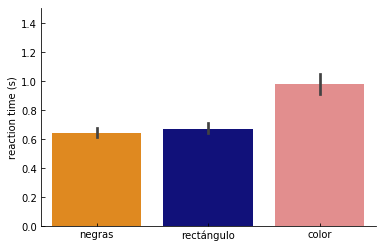

In [3]:
sns.barplot(x='condition', y='rt', data=df, palette=['darkorange', 'darkblue', 'lightcoral'])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xticks([0,1,2], ['negras', 'rectángulo', 'color'])
plt.xlabel('')
plt.ylabel('reaction time (s)')
plt.ylim(0, 1.5);

#### gráfico de cajas + dispersión

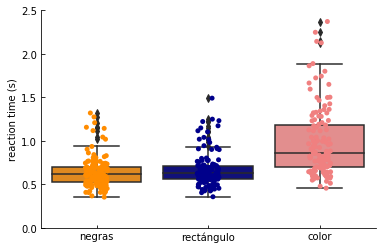

In [4]:
sns.boxplot(x = "condition",  y = "rt",  data = df, 
            palette=['darkorange', 'darkblue', 'lightcoral'])

sns.stripplot(x = "condition",  y = "rt",  data = df,
             palette=['darkorange', 'darkblue', 'lightcoral'])


plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xticks([0,1,2], ['negras', 'rectángulo', 'color'])
plt.xlabel('')
plt.ylabel('reaction time (s)')
plt.ylim(0, 2.5);

#### Gráfico de distribución

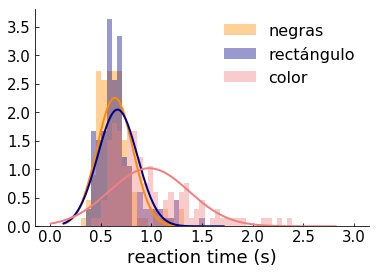

In [5]:

sns.distplot(df.loc[df['condition']=='palabra_negra', 'rt'],  color='darkorange', bins=np.linspace(0,3,60),
             fit=norm, kde=False, fit_kws={"color":'darkorange', 'linewidth':2}, label='negras')

sns.distplot(df.loc[df['condition']=='rectangulo', 'rt'],  color='darkblue', bins=np.linspace(0,3,60),
             fit=norm, kde=False, fit_kws={"color":'darkblue', 'linewidth':2}, label='rectángulo' )

sns.distplot(df.loc[df['condition']=='palabra_color', 'rt'],  color='lightcoral', bins=np.linspace(0,3,60),
             fit=norm, kde=False, fit_kws={"color":'lightcoral', 'linewidth':2}, label='color' )

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc=1, frameon=False, prop={'size': 16})
plt.xlabel('reaction time (s)', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);



# Estadística

#### Anova y comparaciones múltiples

In [6]:
df_stats = df.copy()
df_stats['condition']= df_stats['condition'].replace(['palabra_negra', 'rectangulo', 'palabra_color'], ['control', 'control 1', 'test'])

mod = ols(formula='rt ~ condition', data=df_stats).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)

print( '                                 ')
print( '                                 Anova Table')
print( '==============================================================================')
print( aov_table)
print( '==============================================================================')
print( '                                 ')
print( '                                 ')
print( '                                 ')



####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df_stats.rt.values, groups=df_stats['condition'].values,  alpha=0.05)
print( tukey.summary()    )
print( '                                 ')
print( '                                ')


                                 
                                 Anova Table
              sum_sq     df          F        PR(>F)
condition   9.151946    2.0  61.094978  8.726199e-24
Residual   28.986040  387.0        NaN           NaN
                                 
                                 
                                 
Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1    group2  meandiff  lower  upper  reject
--------------------------------------------------
 control  control 1  0.0271  -0.0528 0.107  False 
 control     test    0.3377   0.2578 0.4175  True 
control 1    test    0.3106   0.2307 0.3904  True 
--------------------------------------------------
                                 
                                


#### regresión con sujetos como variable aleatoria

In [7]:
resultados = smf.mixedlm(formula='rt ~ condition', data=df_stats, groups=df_stats['participant']).fit()
print(resultados.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

             Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    rt      
No. Observations:     390        Method:                REML    
No. Groups:           4          Scale:                 0.0749  
Min. group size:      90         Likelihood:            -54.9612
Max. group size:      105        Converged:             No      
Mean group size:      97.5                                      
----------------------------------------------------------------
                       Coef. Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              0.640    0.024 26.530 0.000  0.593  0.688
condition[T.control 1] 0.027    0.034  0.798 0.425 -0.039  0.094
condition[T.test]      0.338    0.034  9.948 0.000  0.271  0.404
Group Var              0.000    0.004                           



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2026: ConvergenceWarning: Gradient optimization failed.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [8]:
df.participant.unique()

array(['ddd', 'dsb', 'eba', 'Esterix'], dtype=object)